Import the libraries 

In [213]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import neighbors
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset

In [214]:
data=pd.read_csv("/content/water_dataX.csv",encoding="ISO-8859-1")
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [215]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


Exploratory analysis

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [217]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [218]:
#checking null values
data.isna().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [219]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [220]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [221]:
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [222]:
#initialization
start=2
end=1779
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data. columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [223]:
data.head()

,station,location,state,do,ph,co,bod,na,tc,year
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.3,5672.0,2014


WQI CALCULATION

In [224]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7) else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)else 0)))))

#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6) else(80 if  (6>=x>=5.1) else(60 if (5>=x>=4.1) else(40 if (4>=x>=3) else 0)))))

#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  else(80 if  (50>=x>=5) else(60 if (500>=x>=50) else(40 if (10000>=x>=500) else 0)))))

#calculation of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  else(80 if  (6>=x>=3) else(60 if (80>=x>=6) else(40 if (125>=x>=80) else 0)))))

#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  else(80 if  (150>=x>=75) else(60 if (225>=x>=150) else(40 if (300>=x>=225)  else 0)))))

#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0) else(80 if  (50>=x>=20) else(60 if (100>=x>=50) else(40 if (200>=x>=100) else 0)))))
data['wph']=data.npH * 0.165

In [225]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 

In [226]:
#calculation overall wqi for each year
overall_wqi=data.groupby('year')['wqi'].mean()

In [227]:
data1=overall_wqi.reset_index(level=0,inplace=False)
data1

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.879588


Data visualisation 

In [228]:
#visualizing the filttered data
year=data1['year'].values
AQI=data1['wqi'].values
data1['wqi']=pd.to_numeric(data1['wqi'],errors='coerce')
data1['year']=pd.to_numeric(data1['year'],errors='coerce')


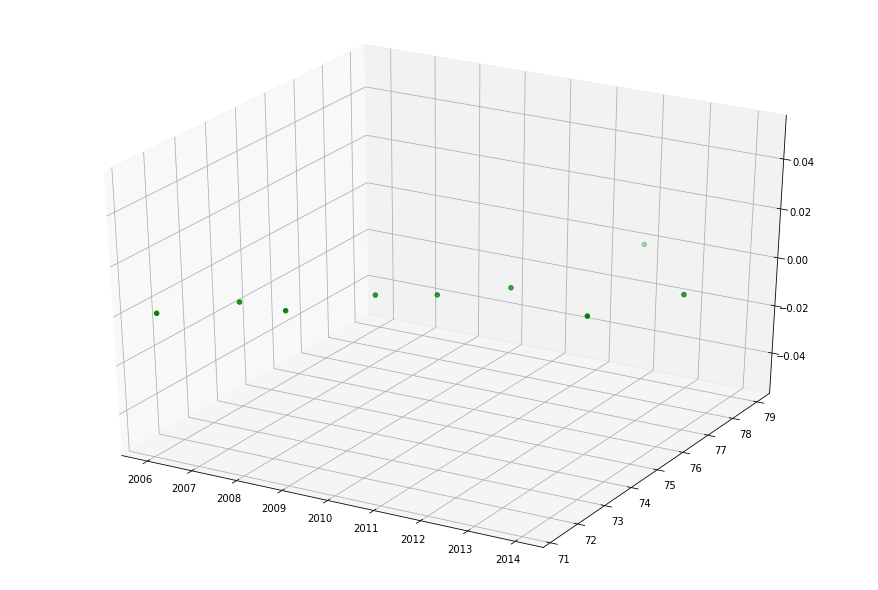

In [229]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 8.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='green')
plt.show()

In [230]:
data1 = data1[np.isfinite(data1['wqi'])]
data1.head()

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723


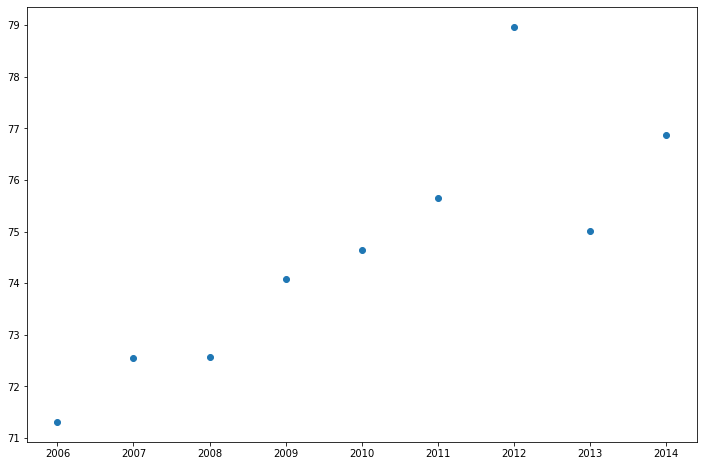

In [231]:
#scatter plot of data points
cols =['year']
x=data1[cols]
y = data1['wqi']
plt.scatter(x,y)
plt.show()

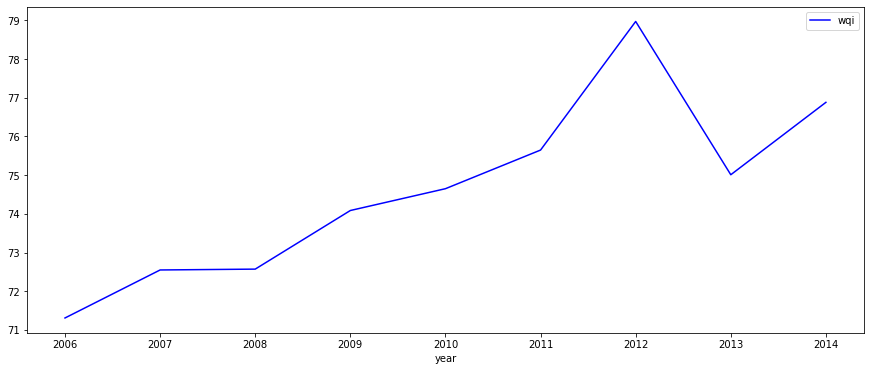

In [232]:
import matplotlib.pyplot as plt
data1=data1.set_index('year')
data1.plot(figsize=(15,6),color="blue")
plt.show()

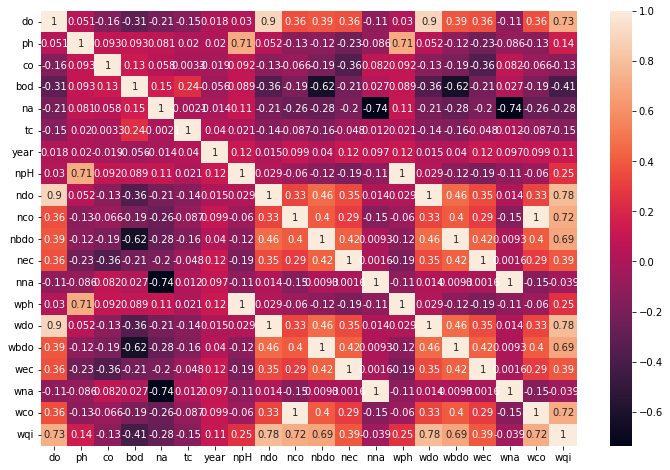

In [252]:
sns.heatmap(data.corr(),annot=True)

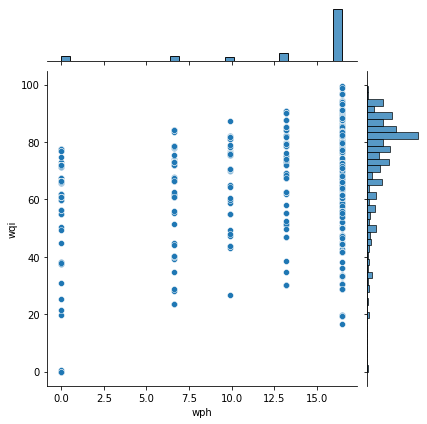

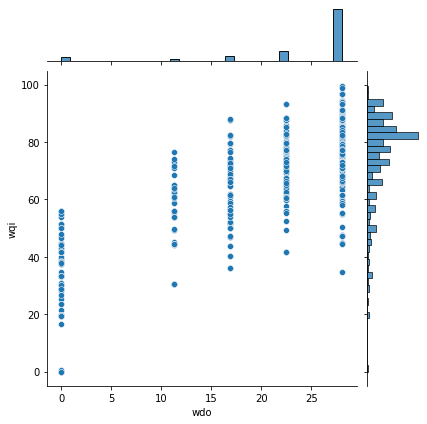

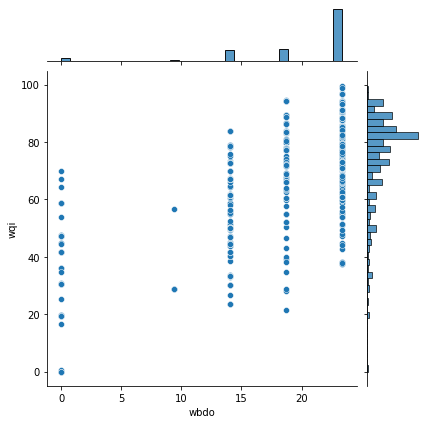

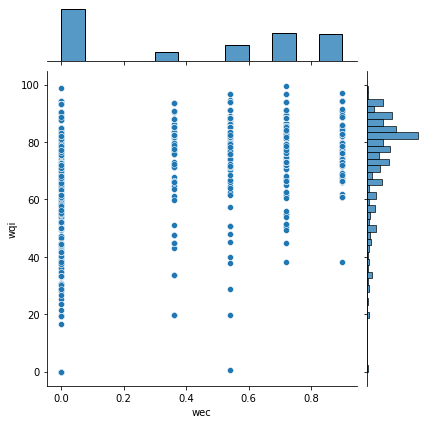

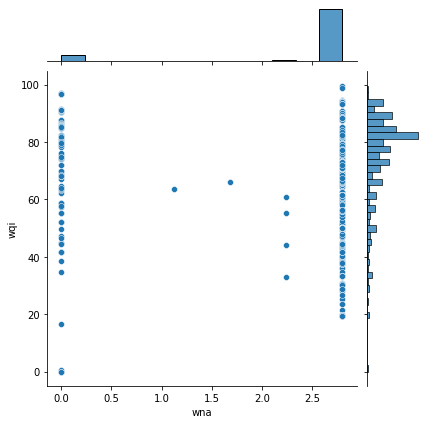

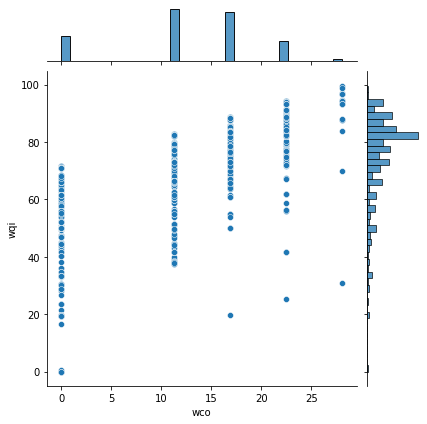

In [253]:
#joint plot
for col1 in ['wph','wdo','wbdo','wec','wna','wco']:
    for col2 in ['wqi']:
        sns.jointplot(x=data[col1],y=data[col2])
        plt.show()                

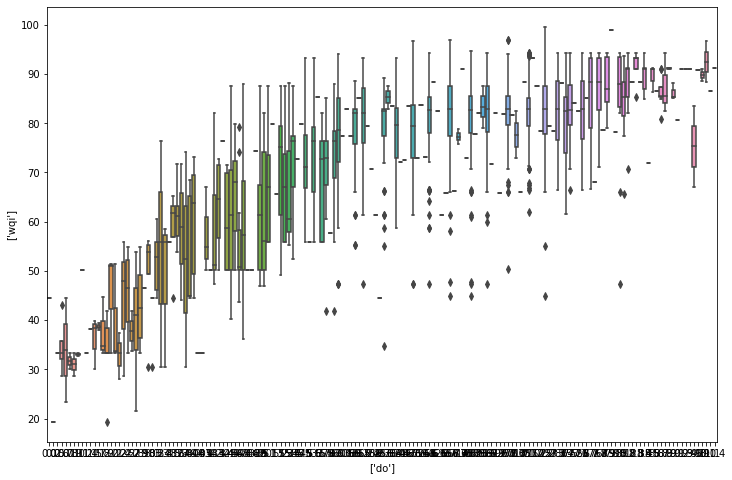

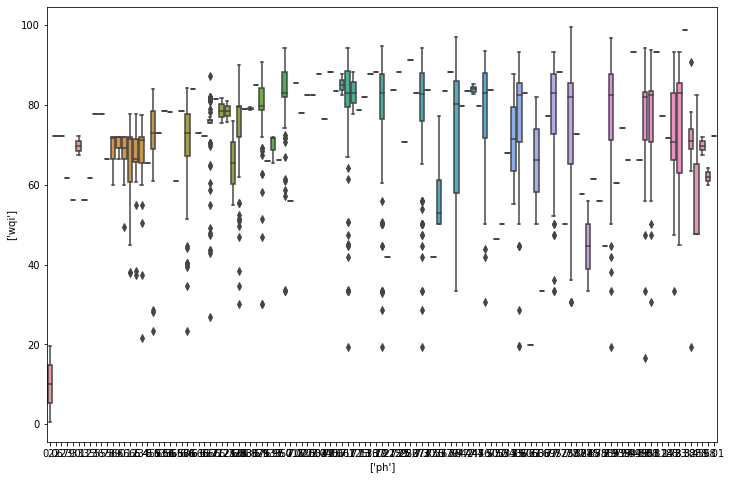

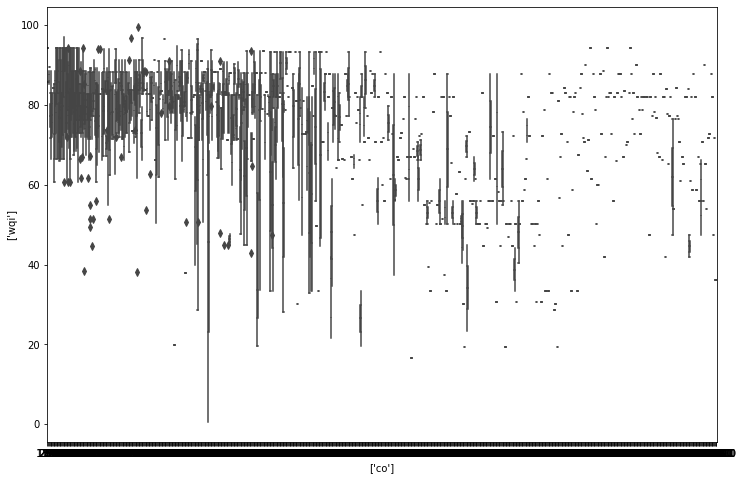

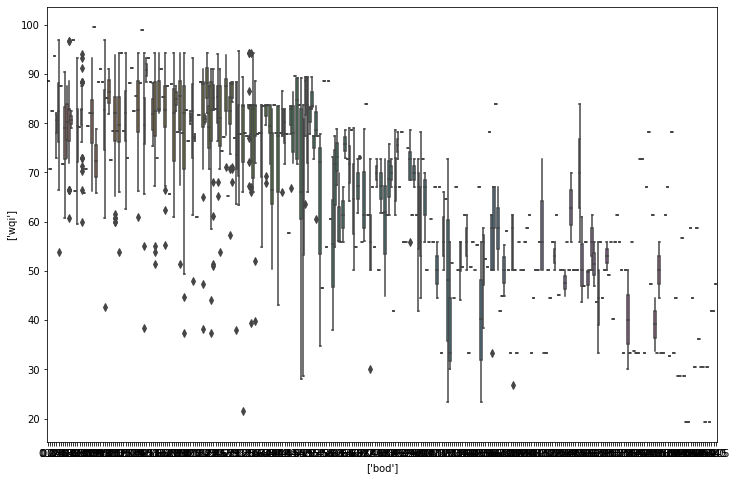

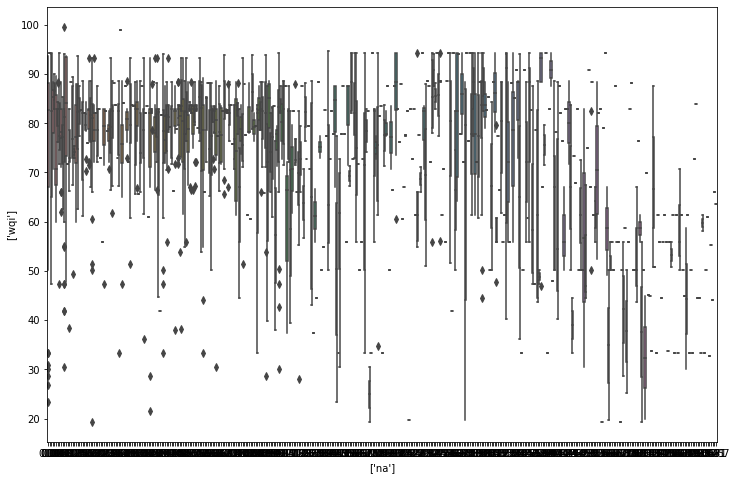

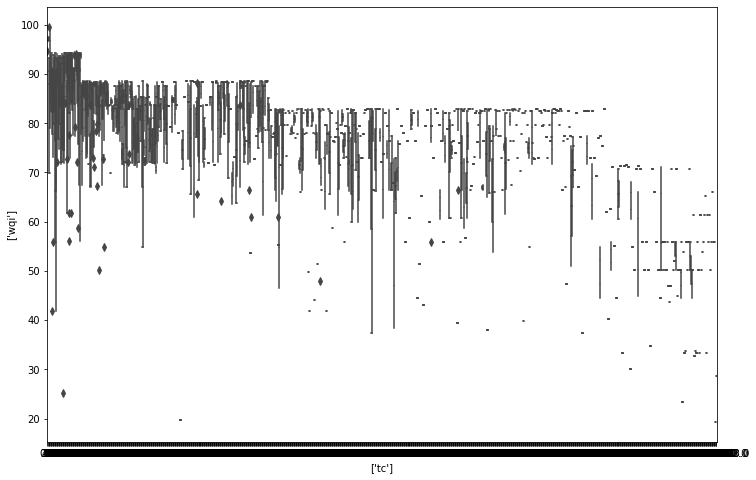

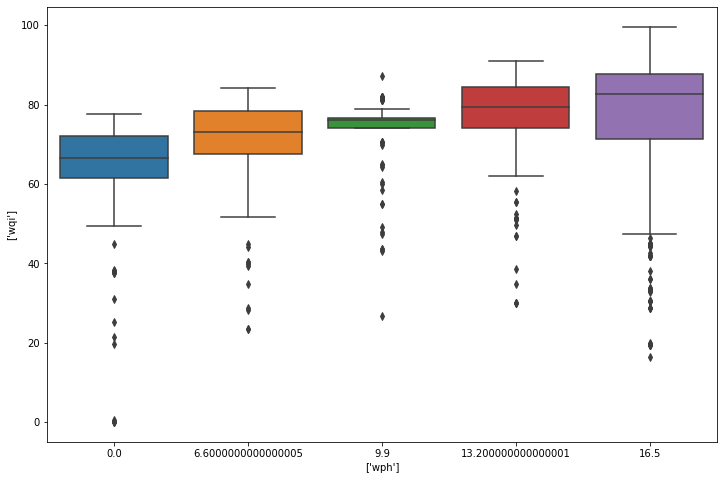

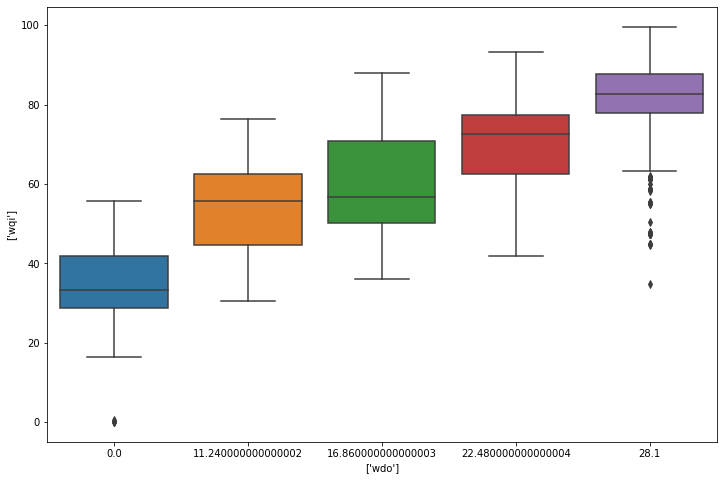

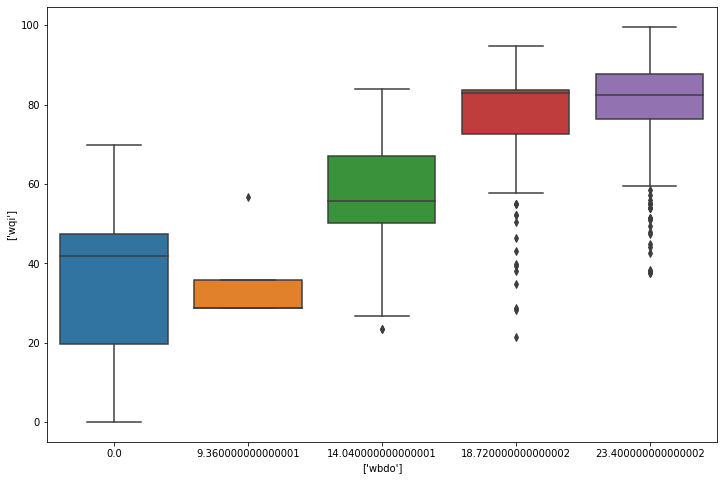

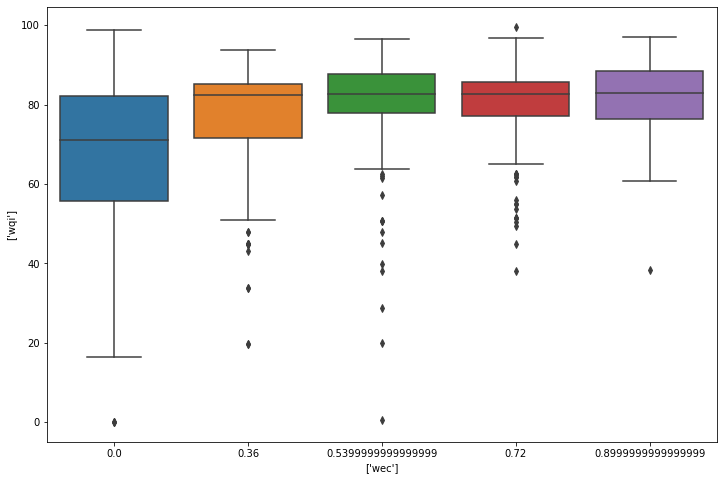

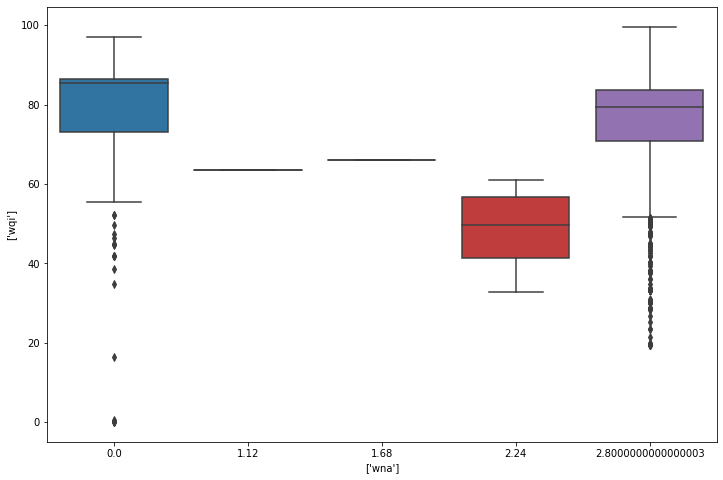

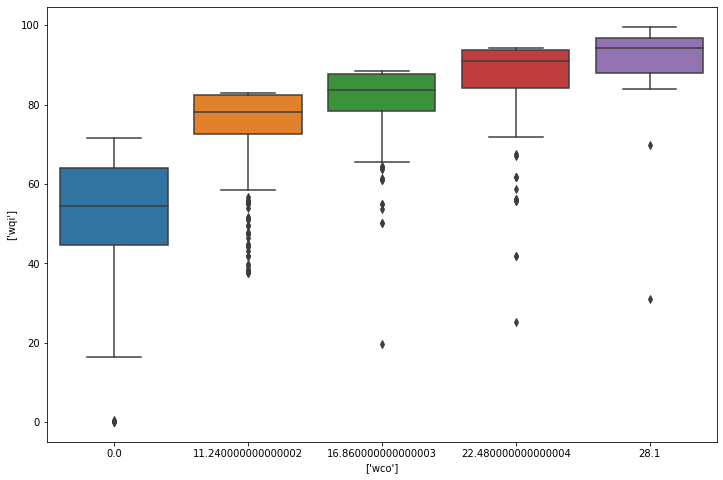

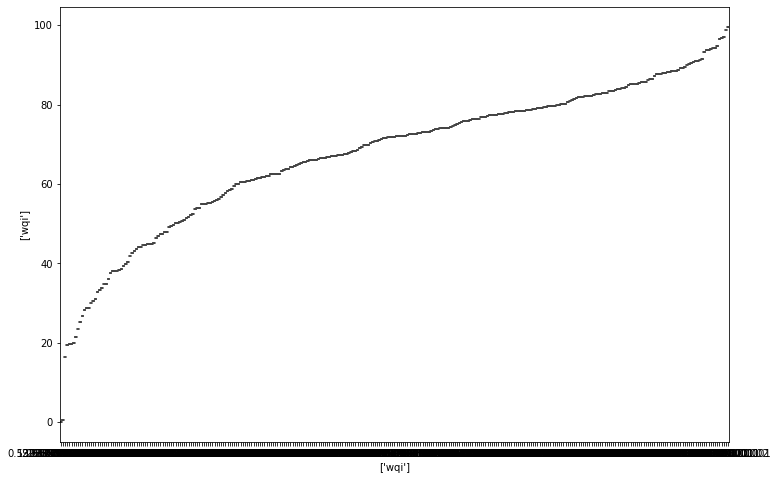

In [255]:
#box plot
for col1 in data.columns:
    if data.dtypes[col1]=='float64':
        for col2 in ['wqi']:
            if data.dtypes[col2]=='float64':
                sns.boxplot(x=data[col1],y=data[col2]).set(xlabel=[col1],ylabel=[col2])
                plt.show()

Handling missing values

In [233]:
df=data[["do","ph","co","bod","na","tc","wqi"]]
df


,do,ph,co,bod,na,tc,wqi
2,6.300,6.900,179.0,1.7,0.1,5330.0,79.28
3,5.800,6.900,64.0,3.8,0.5,8443.0,69.34
4,5.800,7.300,83.0,1.9,0.4,5500.0,77.14
5,5.500,7.400,81.0,1.5,0.1,4049.0,77.14
6,6.100,6.700,308.0,1.4,0.3,5672.0,75.44
...,...,...,...,...,...,...,...
1774,4.600,3.000,350.0,6.2,2.2,49.0,56.18
1775,8.800,7.000,172.0,1.6,5.0,2800.0,82.58
1776,10.000,7.100,150.0,1.0,4.0,350.0,88.38
1777,9.000,7.300,158.0,1.8,7.2,280.0,88.20


In [234]:
df.isnull().sum()

do      27
ph       5
co      17
bod     36
na     171
tc     119
wqi      0
dtype: int64

In [235]:
df.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [236]:
df.isnull().sum()

do     0
ph     0
co     0
bod    0
na     0
tc     0
wqi    0
dtype: int64

In [237]:
x=df.iloc[:,:-1]
x

,do,ph,co,bod,na,tc
2,6.3,6.9,179.0,1.7,0.1,5330.0
3,5.8,6.9,64.0,3.8,0.5,8443.0
4,5.8,7.3,83.0,1.9,0.4,5500.0
5,5.5,7.4,81.0,1.5,0.1,4049.0
6,6.1,6.7,308.0,1.4,0.3,5672.0
...,...,...,...,...,...,...
1773,7.2,7.0,183.0,5.2,2.6,180.0
1774,4.6,3.0,350.0,6.2,2.2,49.0
1775,8.8,7.0,172.0,1.6,5.0,2800.0
1776,10.0,7.1,150.0,1.0,4.0,350.0


In [238]:
y=df['wqi']

splitting the dataset and train

In [239]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
x_train.shape

(1196, 6)

In [240]:
x_train

,do,ph,co,bod,na,tc
1399,7.2,7.8,262.0,0.28,0.15,50.0
977,8.3,7.6,304.0,1.20,0.51,20.0
604,7.0,7.4,55.0,0.90,0.32,1400.0
651,6.4,7.1,183.0,2.30,0.62,398.0
202,5.3,3.3,831.0,7.70,3.20,36.0
...,...,...,...,...,...,...
379,6.4,7.2,49.0,1.40,0.23,1357.0
796,6.4,8.0,155.0,3.90,0.50,516.0
468,7.4,7.2,53.0,1.90,3.00,32.0
182,5.3,7.2,970.0,13.30,5.90,7133.0


In [241]:
x_test.shape

(299, 6)

In [242]:
y_train

1399    93.64
977     93.28
604     82.94
651     88.20
202     61.80
        ...  
379     82.94
796     77.90
468     94.18
182     67.06
1328    38.34
Name: wqi, Length: 1196, dtype: float64

In [243]:
y_test

391     87.66
1209    88.38
1615    82.04
1289    78.66
336     85.26
        ...  
1471    73.04
140     88.38
1465    76.16
1421    94.00
1180    51.54
Name: wqi, Length: 299, dtype: float64

Linear and random forest regression

In [244]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(random_state = 0) 
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [246]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,ypred)))

2.793612159252081


In [247]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

Model evaluation 

In [248]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ypred))
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))



MAE: 0.8851505016722571
MSE: 7.804268896321073
RMSE: 2.793612159252081


SAVING THE MODEL

In [249]:
import pickle
pickle.dump( RandomForestRegressor,open('wqi.pkl', 'wb'))
model = pickle.load(open('wqi.pkl','rb'))